In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
''' Returns the squared length of vec. '''
def length_sq(vec):
    sum_sq = 0
    for i in range(0, len(vec)):
        sum_sq += vec[i]
    return sum_sq

In [3]:
''' Returns the length of vec. '''
def length(vec):
    return math.sqrt(length_sq(vec))

In [4]:
''' Returns a random point in a d-dimensional ball using rejection sampling, along with the number of trials. '''
def rejection_sampling(d):
    trials = 0
    while True:
        trials += 1
        vec = []
        for i in range(d):
           vec.append(random.random())
        if (length_sq(vec) <= 1):
            return (vec, trials)

In [5]:
''' Runs rejection sampling for a d-dimensional vector t times and returns the average number of trials. '''
def rej_avg_trials(d, t):
    total = 0
    for i in range(t):
        total += rejection_sampling(d)[1]
    return total / t

In [6]:
num_points = 3141  # 314 points takes about 30s, 3141 can take up to 5 minutes
avg_trials = []
for i in range(8):
    avg_trials.append(rej_avg_trials(i + 1, num_points))
print(avg_trials)

[1.0, 1.9872652021649155, 6.037567653613499, 23.28430436166826, 122.61095192613817, 711.0792741165234, 5022.741483603948, 40197.09328239414]


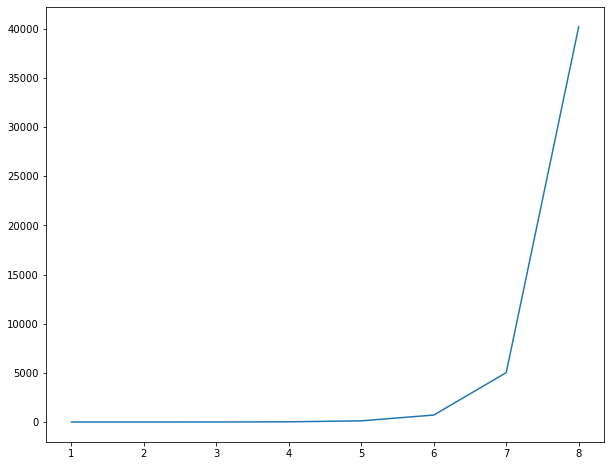

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, 9), avg_trials)
plt.yscale("linear")

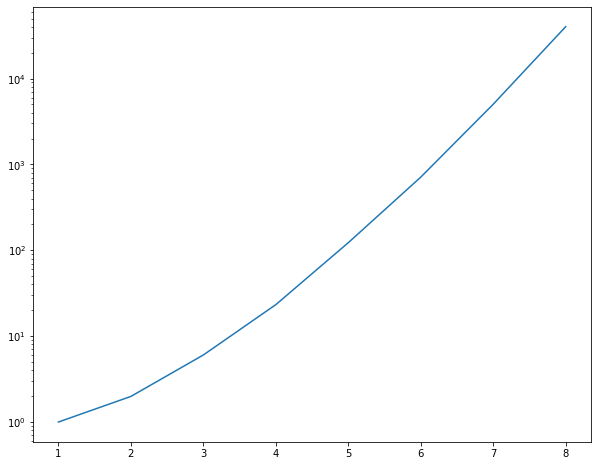

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, 9), avg_trials)
plt.yscale("log")

In [9]:
# https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
n = 61
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x, y = np.meshgrid(x, y)

x

array([[-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       ...,
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ],
       [-3. , -2.9, -2.8, ...,  2.8,  2.9,  3. ]])

In [10]:
# Mean vector and covariance matrix
mu = np.array(np.zeros(2))  # Same as [0., 0.]
Sigma = np.array(np.identity(2))  # 2x2 identity matrix

# Pack x and y into a single 3-dimensional array
pos = np.empty((n, n, 2))
pos[:, :, 0] = x
pos[:, :, 1] = y

pos

array([[[-3. , -3. ],
        [-2.9, -3. ],
        [-2.8, -3. ],
        ...,
        [ 2.8, -3. ],
        [ 2.9, -3. ],
        [ 3. , -3. ]],

       [[-3. , -2.9],
        [-2.9, -2.9],
        [-2.8, -2.9],
        ...,
        [ 2.8, -2.9],
        [ 2.9, -2.9],
        [ 3. , -2.9]],

       [[-3. , -2.8],
        [-2.9, -2.8],
        [-2.8, -2.8],
        ...,
        [ 2.8, -2.8],
        [ 2.9, -2.8],
        [ 3. , -2.8]],

       ...,

       [[-3. ,  2.8],
        [-2.9,  2.8],
        [-2.8,  2.8],
        ...,
        [ 2.8,  2.8],
        [ 2.9,  2.8],
        [ 3. ,  2.8]],

       [[-3. ,  2.9],
        [-2.9,  2.9],
        [-2.8,  2.9],
        ...,
        [ 2.8,  2.9],
        [ 2.9,  2.9],
        [ 3. ,  2.9]],

       [[-3. ,  3. ],
        [-2.9,  3. ],
        [-2.8,  3. ],
        ...,
        [ 2.8,  3. ],
        [ 2.9,  3. ],
        [ 3. ,  3. ]]])

In [11]:
rv = multivariate_normal(mu, Sigma)
rv.pdf(pos)

array([[1.96412803e-05, 2.63807214e-05, 3.50800815e-05, ...,
        3.50800815e-05, 2.63807214e-05, 1.96412803e-05],
       [2.63807214e-05, 3.54326422e-05, 4.71169822e-05, ...,
        4.71169822e-05, 3.54326422e-05, 2.63807214e-05],
       [3.50800815e-05, 4.71169822e-05, 6.26543738e-05, ...,
        6.26543738e-05, 4.71169822e-05, 3.50800815e-05],
       ...,
       [3.50800815e-05, 4.71169822e-05, 6.26543738e-05, ...,
        6.26543738e-05, 4.71169822e-05, 3.50800815e-05],
       [2.63807214e-05, 3.54326422e-05, 4.71169822e-05, ...,
        4.71169822e-05, 3.54326422e-05, 2.63807214e-05],
       [1.96412803e-05, 2.63807214e-05, 3.50800815e-05, ...,
        3.50800815e-05, 2.63807214e-05, 1.96412803e-05]])

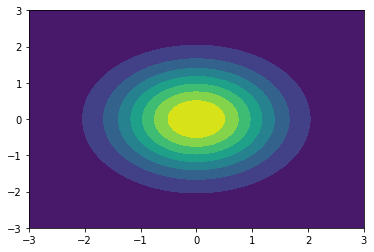

In [12]:
plt.contourf(x, y, rv.pdf(pos))

Text(0.5, 0, 'rv.pdf')

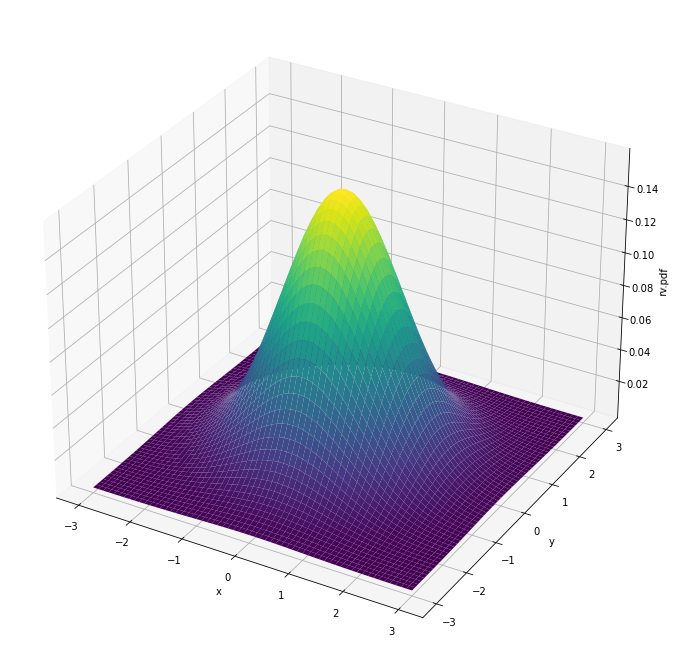

In [13]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('rv.pdf')